In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [3]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [4]:
train['rev_scores'] = train['Reviews'].apply(lambda x : x.split(' ')[0])
train['rev_scores'] = train['rev_scores'].astype('float')
test['rev_scores'] = test['Reviews'].apply(lambda x : x.split(' ')[0])
test['rev_scores'] = test['rev_scores'].astype('float')

In [5]:
train['edition_date'] = train['Edition'].apply(lambda x: x.split(',')[1][2:])
test['edition_date'] = test['Edition'].apply(lambda x: x.split(',')[1][2:])

In [6]:
train['ed_type'] = train['Edition'].apply(lambda x : x.split(',')[0])
test['ed_type'] = test['Edition'].apply(lambda x : x.split(',')[0])

In [7]:
train['ratings_n'] = train['Ratings'].apply(lambda x : x.split(' ')[0])
test['ratings_n'] = test['Ratings'].apply(lambda x : x.split(' ')[0])

In [8]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,rev_scores,edition_date,ed_type,ratings_n
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,4.0,10 Mar 2016,Paperback,8
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,3.9,7 Nov 2012,Paperback,14
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,4.8,25 Feb 1982,Paperback,6
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,4.1,5 Oct 2017,Paperback,13
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,5.0,10 Oct 2006,Hardcover,1


In [9]:
train['Author'].nunique()

3679

In [10]:
#Applying a first round of text cleaning technique
import re
import string

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?]','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

In [11]:
train['bc'] = train['BookCategory'].apply(lambda x : clean_text_round1(x))

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(train['bc'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm

,accounts,action,adventure,arts,biographies,comics,computing,crime,diaries,digital,...,mangas,media,mystery,photography,politics,romance,sports,thriller,true,writing
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6233,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
6234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6235,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data_dtm.columns

Index(['accounts', 'action', 'adventure', 'arts', 'biographies', 'comics',
       'computing', 'crime', 'diaries', 'digital', 'film', 'humour',
       'internet', 'language', 'linguistics', 'mangas', 'media', 'mystery',
       'photography', 'politics', 'romance', 'sports', 'thriller', 'true',
       'writing'],
      dtype='object')

In [14]:
cat_num = []
for i in range(0,train.shape[0]):
    cat_num.append(data_dtm.iloc[i].sum())

In [15]:
train['cat_num'] = cat_num

In [16]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,rev_scores,edition_date,ed_type,ratings_n,bc,cat_num
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,4.0,10 Mar 2016,Paperback,8,action adventure,2
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,3.9,7 Nov 2012,Paperback,14,biographies diaries true accounts,4
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,4.8,25 Feb 1982,Paperback,6,humour,1
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,4.1,5 Oct 2017,Paperback,13,crime thriller mystery,3
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,5.0,10 Oct 2006,Hardcover,1,arts film photography,3


In [17]:
pd.concat((train, data_dtm),1).head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,rev_scores,...,mangas,media,mystery,photography,politics,romance,sports,thriller,true,writing
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,4.0,...,0,0,0,0,0,0,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,3.9,...,0,0,0,0,0,0,0,0,1,0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,4.8,...,0,0,0,0,0,0,0,0,0,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,4.1,...,0,0,1,0,0,0,0,1,0,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,5.0,...,0,0,0,1,0,0,0,0,0,0


In [18]:
test['bc'] = test['BookCategory'].apply(lambda x : clean_text_round1(x))

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(test['bc'])
data_dtm1 = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm1

,accounts,action,adventure,arts,biographies,comics,computing,crime,diaries,digital,...,mangas,media,mystery,photography,politics,romance,sports,thriller,true,writing
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1556,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1558,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
cat_num1 = []
for i in range(0,test.shape[0]):
    cat_num1.append(data_dtm1.iloc[i].sum())

In [21]:
test['cat_num'] = cat_num1

In [22]:
pd.concat((test, data_dtm1),1)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,rev_scores,edition_date,...,mangas,media,mystery,photography,politics,romance,sports,thriller,true,writing
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery",4.4,1 Oct 1986,...,0,0,1,0,0,0,0,1,0,0
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media",5.0,Import,...,0,1,0,0,0,0,0,0,0,0
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance,5.0,17 Mar 2011,...,0,0,0,0,0,1,0,0,0,0
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media",4.1,2016,...,0,1,0,0,0,0,0,0,0,0
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing",4.4,26 Dec 2011,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media",5.0,14 Apr 2011,...,0,1,0,0,0,0,0,0,0,0
1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts",3.6,8 May 2013,...,0,0,0,0,0,0,0,0,1,0
1557,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour,4.0,6 Sep 2011,...,0,0,0,0,0,0,0,0,0,0
1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts",3.5,22 Sep 2009,...,0,0,0,0,0,0,0,0,1,0


In [23]:
train['ed_type'].value_counts()

Paperback                5197
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
Leather Bound               1
Product Bundle              1
Board book                  1
Perfect Paperback           1
Plastic Comb                1
Library Binding             1
Name: ed_type, dtype: int64

In [24]:
train['Edition'].apply(lambda x : x.split(',')[-1].split(' ')[-1]).unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', 'Import', '1997', '1995', 'NTSC',
       '1987', '1986', '1990', '1988', '1981', '1976', '1994', '1998',
       '1977', '1974', '1983', '1971', '1985', '1978', 'Facsimile', 'set',
       'Edition', '1964', '1984', '1980', 'Unabridged', '1979', 'Print',
       '1960', '1970', '1975', '1905', '1900', 'Audiobook', '1961',
       '1925', '1973'], dtype=object)

###### Author

In [25]:
author = pd.concat((train['Author'],test['Author']),0)

In [26]:
auth1 = author.value_counts()[(author.value_counts()<=1)].index.tolist()
#auth5 = author.value_counts()[(author.value_counts()>1) & (author.value_counts() <= 5) ].index.tolist()
auth10 = author.value_counts()[(author.value_counts()>1) & (author.value_counts() <= 10) ].index.tolist()
auth10a = author.value_counts()[(author.value_counts()>10) ].index.tolist()

In [27]:
auth = []
for i in train['Author']:
    if i in auth1:
        auth.append('auth1')
    #if i in auth5:
        #auth.append('auth5')
    if i in auth10:
        auth.append('auth10')
    if i in auth10a:
        auth.append('auth10a')

In [28]:
train['auth'] = auth

In [29]:
auth_t = []
for i in test['Author']:
    if i in auth1:
        auth_t.append('auth1')
    #if i in auth5:
        #auth_t.append('auth5')
    if i in auth10:
        auth_t.append('auth10')
    if i in auth10a:
        auth_t.append('auth10a')
    

In [30]:
test['auth'] = auth_t

In [31]:
#Identifying the maximum number of authors for a single book from the given datasets
authors_1 = list(train['Author'])
authors_2 = list(test['Author'])

authors_1.extend(authors_2)

authorslis = [i.split(",") for i in authors_1]

max = 1
for i in authorslis:
  if len(i) >= max:
    max = len(i)
print("Max. number of authors for a single boook = ",max)

for i in range(len(authorslis)):
  if len(authorslis[i]) == max:
    print(i)    
    
all_authors = [author.strip().upper() for listin in authorslis for author in listin]

Max. number of authors for a single boook =  7
7008


In [32]:
authors_1 = list(train['Author'])
authorslis_1 = [i.split(',') for i in authors_1]
authors_num_1 = []
for i in authorslis_1:
    authors_num_1.append(len(i))

authors_2 = list(test['Author'])
authorslis_2 = [i.split(',') for i in authors_2]
authors_num_2 = []
for i in authorslis_2:
    authors_num_2.append(len(i))


In [33]:
train['authors_num'] = authors_num_1
test['authors_num'] = authors_num_2

###### Genre

In [34]:
test['Genre']

0                            Short Stories (Books)
1                      Operating Systems Textbooks
2                                  Romance (Books)
3       Programming & Software Development (Books)
4                              Linguistics (Books)
                           ...                    
1555                                        Design
1556                  Children's Reference (Books)
1557                                Humour (Books)
1558                         United States History
1559                                  Dictionaries
Name: Genre, Length: 1560, dtype: object

In [35]:
train['gen'] = train['Genre'].apply(lambda x : x.replace(' (Books)',''))
test['gen'] = test['Genre'].apply(lambda x : x.replace(' (Books)',''))

In [36]:
gen_train = pd.get_dummies(train['gen'])
gen_test = pd.get_dummies(test['gen'])

In [37]:
gen = []
for i in gen_train.columns:
    if i in list(gen_test.columns):
        gen.append(i)
    else:
        continue

In [38]:
len(gen)

207

In [39]:
gen_train = gen_train[gen]
gen_test = gen_test[gen]

###### Synopsis

In [40]:
train['syn'] = train['Synopsis'].apply(lambda x : clean_text_round1(x))
test['syn'] = test['Synopsis'].apply(lambda x : clean_text_round1(x))

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(train['syn'])
data_dtm_syn = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm_syn.head()

,aa,aac,aacs,aadhaar,aadhunik,aadmi,aadmis,aahana,aaina,aakash,...,शब,शहर,शहरन,सकत,सभ,सम,सह,हम,क़म,ﬁeldbased
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
syn_num = []
for i in range(0,train.shape[0]):
    syn_num.append(data_dtm_syn.iloc[i].sum())

In [43]:
train['syn_count'] = syn_num

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(test['syn'])
data_dtm_syn1 = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm_syn1.head()

,aaaaah,aadi,aakash,aand,aang,aangs,aankho,aarav,aaravs,aaronovitch,...,zynpagua,ántonia,élise,émigré,époque,étranger,ìlearnî,ﬁction,ﬁlm,ﬁve
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
syn_num1 = []
for i in range(0,test.shape[0]):
    syn_num1.append(data_dtm_syn1.iloc[i].sum())

In [46]:
test['syn_count'] = syn_num1

###### Year

In [47]:
temp = []
l =  train['Edition'].apply(lambda x : x.split(',')[-1].split(' ')[-1])
for i in l:
    if i in ['Import','Print','Illustrated','set','NTSC','Facsimile','Edition','Unabridged','Audiobook']:
        temp.append(np.nan)
    else:
        temp.append(float(i))

train['Year'] = temp

In [48]:
temp = []
l =  test['Edition'].apply(lambda x : x.split(',')[-1].split(' ')[-1])
for i in l:
    if i in ['Import','Print','Illustrated','set']:
        temp.append(np.nan)
    else:
        temp.append(float(i))

test['Year'] = temp

###### Month

In [49]:
train['Month'] = train['Edition'].apply(lambda x : x.split(',')[-1].split(' ')[-2])
test['Month'] = test['Edition'].apply(lambda x : x.split(',')[-1].split(' ')[-2])

In [50]:
def Month(x):
    if x == 'Jan':
        return 1
    if x == 'Feb':
        return 2
    if x == 'Mar':
        return 3
    if x == 'Apr':
        return 4
    if x == 'May':
        return 5
    if x == 'Jun':
        return 6
    if x == 'Jul':
        return 7
    if x == 'Aug':
        return 8
    if x == 'Sep':
        return 9
    if x == 'Oct':
        return 10
    if x == 'Nov':
        return 11
    if x == 'Dec':
        return 12
    else:
        return np.nan
    

In [51]:
train['Month'] = train['Month'].apply(lambda x: Month(x))
test['Month'] = test['Month'].apply(lambda x: Month(x))

###### Import

In [52]:
temp = []
for i in train['Edition']:
    i = i.lower()
    if 'import' in i:
        temp.append(1)
    else:
        temp.append(0)
train['import'] = temp

temp = []
for i in test['Edition']:
    i = i.lower()
    if 'import' in i:
        temp.append(1)
    else:
        temp.append(0)
test['import'] = temp

In [53]:
print('train\n',train['import'].value_counts())
print('test\n',test['import'].value_counts())

train
 0    5612
1     625
Name: import, dtype: int64
test
 0    1400
1     160
Name: import, dtype: int64


###### Illustrated

In [54]:
temp = []
for i in train['Edition']:
    i = i.lower()
    if 'illustrated' in i:
        temp.append(1)
    else:
        temp.append(0)
train['Illustrated'] = temp

temp = []
for i in test['Edition']:
    i = i.lower()
    if 'illustrated' in i:
        temp.append(1)
    else:
        temp.append(0)
test['Illustrated'] = temp

In [55]:
print('train\n',train['Illustrated'].value_counts())
print('test\n',test['Illustrated'].value_counts())

train
 0    6184
1      53
Name: Illustrated, dtype: int64
test
 0    1541
1      19
Name: Illustrated, dtype: int64


###### Audiobook

In [56]:
temp = []
for i in train['Edition']:
    i = i.lower()
    if 'audiobook' in i:
        temp.append(1)
    else:
        temp.append(0)
train['Audiobook'] = temp

temp = []
for i in test['Edition']:
    i = i.lower()
    if 'audiobook' in i:
        temp.append(1)
    else:
        temp.append(0)
test['Audiobook'] = temp

In [57]:
print('train\n',train['Audiobook'].value_counts())
print('test\n',test['Audiobook'].value_counts())

train
 0    6226
1      11
Name: Audiobook, dtype: int64
test
 0    1553
1       7
Name: Audiobook, dtype: int64


###### From Books

In [58]:
temp = []
for i in train['Genre']:
    i = i.lower()
    if 'books' in i:
        temp.append(1)
    else:
        temp.append(0)
train['FromBooks'] = temp

temp = []
for i in test['Genre']:
    i = i.lower()
    if 'books' in i:
        temp.append(1)
    else:
        temp.append(0)
test['FromBooks'] = temp

In [59]:
print('train\n',train['FromBooks'].value_counts())
print('test\n',test['FromBooks'].value_counts())

train
 1    5129
0    1108
Name: FromBooks, dtype: int64
test
 1    1266
0     294
Name: FromBooks, dtype: int64


###### SUBJECTIVITY and POLARITY

In [60]:

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [61]:
train['Polarity'] = train['Synopsis'].apply(pol )
test['Polarity'] = test['Synopsis'].apply(pol)
train['title_polarity'] = train['Title'].apply(pol)
test['title_polarity'] = test['Title'].apply(pol)

train['Subjectivity'] = train['Synopsis'].apply(sub)
test['Subjectivity'] = test['Synopsis'].apply(sub)
train['title_subjectivity'] = train['Title'].apply(sub)
test['title_subjectivity'] = test['Title'].apply(sub)

In [62]:
train.head(3)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,rev_scores,...,Year,Month,import,Illustrated,Audiobook,FromBooks,Polarity,title_polarity,Subjectivity,title_subjectivity
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,4.0,...,2016.0,3.0,0,0,0,1,0.208800,0.0,0.451340,0.0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,3.9,...,2012.0,11.0,0,0,0,1,0.183471,0.0,0.522176,0.0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,4.8,...,1982.0,2.0,0,0,0,0,0.191075,0.0,0.465767,0.0


In [63]:
train['Author'].value_counts()

Agatha Christie    69
Ladybird           49
DK                 48
Albert Uderzo      34
Herge              34
                   ..
Irving Stone        1
Sidney Lumet        1
P. Sinha            1
Annapoorna          1
Anthony Burgess     1
Name: Author, Length: 3679, dtype: int64

In [64]:
df_train = train.copy()
df_test = test.copy()

In [65]:
df2 = pd.concat((df_train.iloc[:,8:].drop(['edition_date','bc','syn','gen'],1), data_dtm, gen_train),1)
Xt = pd.concat((df_test.iloc[:,8:].drop(['edition_date','bc','syn','gen'],1), data_dtm1, gen_test),1)

In [66]:
df2['ratings_n'] = df2['ratings_n'].apply(lambda x : x.replace(',','')).astype('float')
Xt['ratings_n'] = Xt['ratings_n'].apply(lambda x : x.replace(',','')).astype('float')

In [67]:
df3 = pd.get_dummies(df2, drop_first = True)
Xt1 = pd.get_dummies(Xt,drop_first = True)

In [68]:
a = []
for i in df3.columns:
    if i in list(Xt1.columns):
        a.append(i)
    else:
        continue
        

In [69]:
X = df3[a]
y = df3['Price']
Xt1 = Xt1[a]

In [70]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors = 5)

In [71]:
X = pd.DataFrame(knn.fit_transform(X), columns = X.columns)
Xt1 = pd.DataFrame(knn.transform(Xt1), columns = Xt1.columns)

In [72]:
X['age'] = 2020 - X['Year']
Xt1['age'] = 2020 - Xt1['Year']

In [73]:
pd.concat((X,y),1)

,rev_scores,ratings_n,cat_num,authors_num,syn_count,Year,Month,import,Illustrated,Audiobook,...,ed_type_Hardcover,ed_type_Loose Leaf,ed_type_Mass Market Paperback,ed_type_Paperback,ed_type_Sheet music,ed_type_Spiral-bound,auth_auth10,auth_auth10a,age,Price
0,4.0,8.0,2.0,1.0,68.0,2016.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,220.00
1,3.9,14.0,4.0,1.0,112.0,2012.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,8.0,202.93
2,4.8,6.0,1.0,1.0,129.0,1982.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,38.0,299.00
3,4.1,13.0,3.0,1.0,34.0,2017.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,180.00
4,5.0,1.0,3.0,1.0,48.0,2006.0,10.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,965.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,5.0,2.0,1.0,1.0,125.0,2018.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,322.00
6233,3.3,9.0,3.0,1.0,98.0,2016.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,421.00
6234,3.8,3.0,1.0,1.0,112.0,2006.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,14.0,399.00
6235,3.5,4.0,2.0,1.0,81.0,2015.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,319.00


In [74]:
abs(pd.concat((X,y),1).corr())['Price'].sort_values()

Children's Science Fiction    0.000013
Car Racing                    0.000106
Agriculture & Farming         0.000288
Spirituality                  0.000326
United States History         0.000347
                                ...   
digital                       0.175736
computing                     0.175736
ed_type_Paperback             0.211975
ed_type_Hardcover             0.238766
Price                         1.000000
Name: Price, Length: 258, dtype: float64

###### StandardScaler

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xs = sc.fit_transform(X)
Xs = pd.DataFrame(Xs, columns = X.columns)
Xs.head()

,rev_scores,ratings_n,cat_num,authors_num,syn_count,Year,Month,import,Illustrated,Audiobook,...,ed_type_Flexibound,ed_type_Hardcover,ed_type_Loose Leaf,ed_type_Mass Market Paperback,ed_type_Paperback,ed_type_Sheet music,ed_type_Spiral-bound,auth_auth10,auth_auth10a,age
0,-0.442603,-0.186583,-0.316197,-0.203922,-0.357169,0.520964,-1.066913,-0.333719,-0.092577,-0.042033,...,-0.0491,-0.389889,-0.01791,-0.15964,0.447343,-0.062152,-0.025333,1.183118,-0.457885,-0.520964
1,-0.593558,-0.146579,1.518334,-0.203922,0.512819,0.015228,1.331197,-0.333719,-0.092577,-0.042033,...,-0.0491,-0.389889,-0.01791,-0.15964,0.447343,-0.062152,-0.025333,1.183118,-0.457885,-0.015228
2,0.765038,-0.199918,-1.233462,-0.203922,0.848950,-3.777793,-1.366677,-0.333719,-0.092577,-0.042033,...,-0.0491,-0.389889,-0.01791,-0.15964,0.447343,-0.062152,-0.025333,1.183118,-0.457885,3.777793
3,-0.291648,-0.153246,0.601068,-0.203922,-1.029432,0.647398,1.031434,-0.333719,-0.092577,-0.042033,...,-0.0491,-0.389889,-0.01791,-0.15964,0.447343,-0.062152,-0.025333,-0.845224,2.183955,-0.647398
4,1.066948,-0.233255,0.601068,-0.203922,-0.752618,-0.743376,1.031434,-0.333719,-0.092577,-0.042033,...,-0.0491,2.564834,-0.01791,-0.15964,-2.235423,-0.062152,-0.025333,-0.845224,-0.457885,0.743376


In [76]:
Xt3 = sc.transform(Xt1)
Xt3 = pd.DataFrame(Xt3, columns = Xt1.columns)

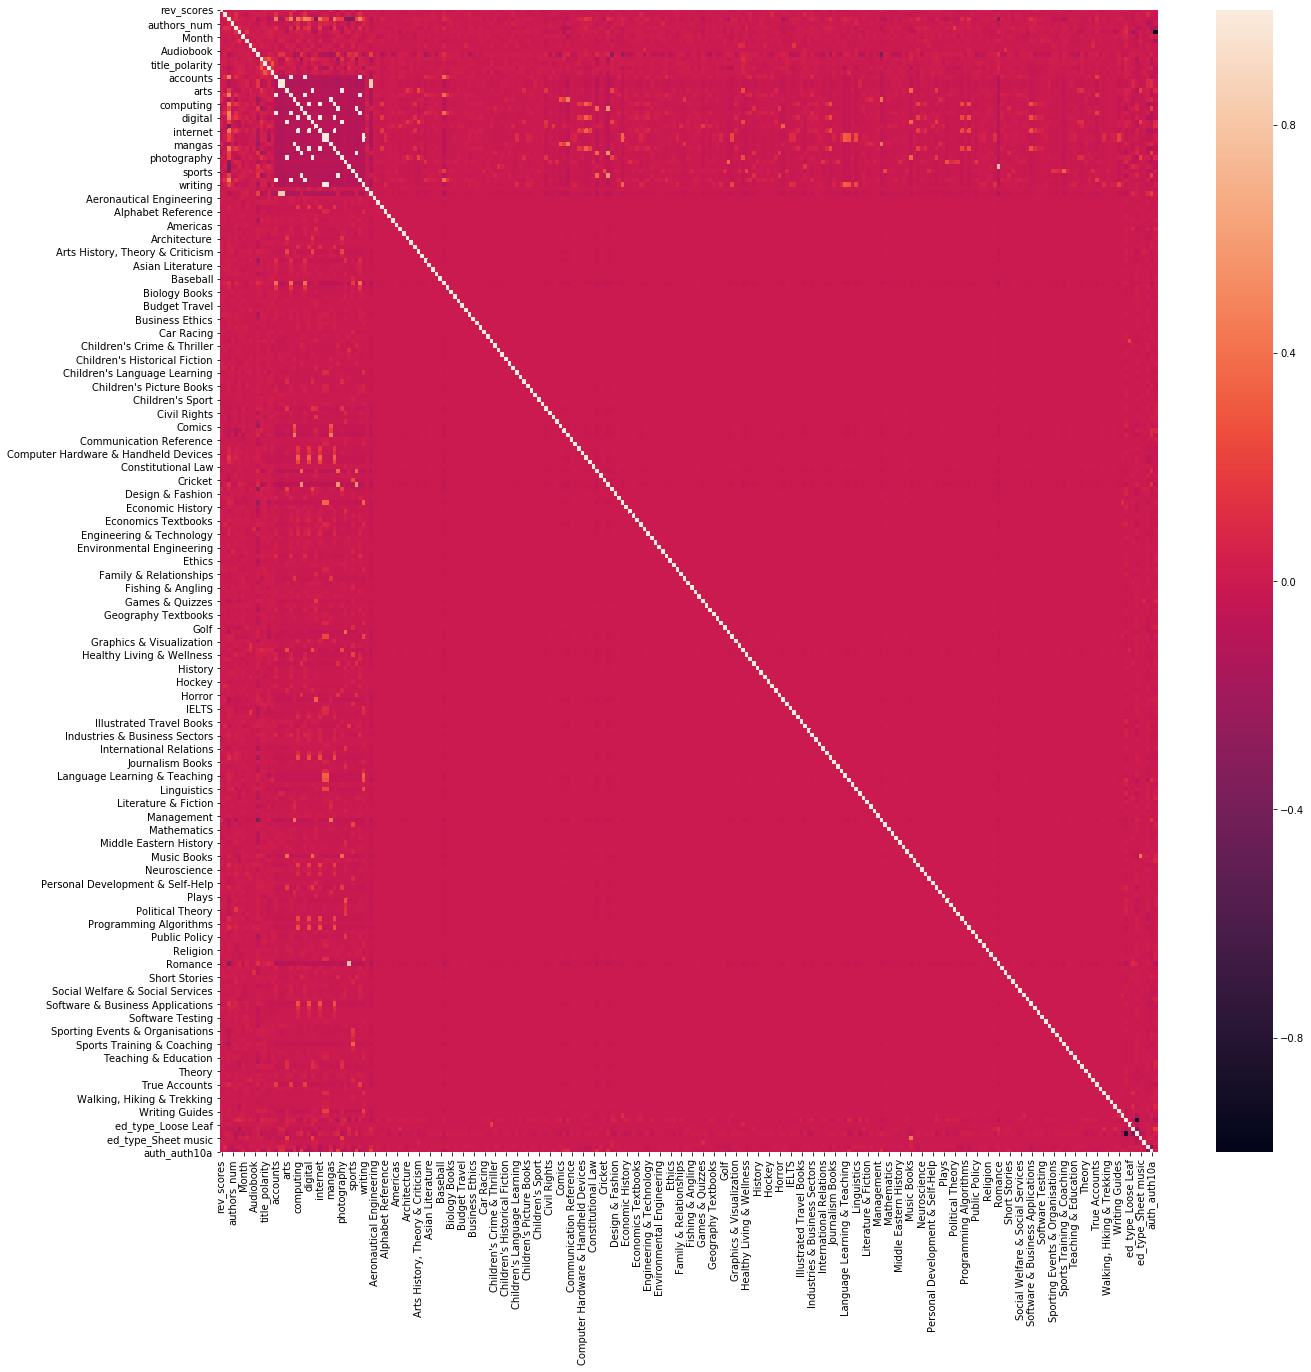

In [77]:
plt.figure(figsize = (21,21))
sns.heatmap(Xs.corr())
plt.show()

###### PCA Transformation

In [78]:
from sklearn.decomposition import PCA
pca = PCA(.95)
X_pca = pca.fit_transform(Xs)

In [79]:
l = len(pca.explained_variance_ratio_)
pc = []
for i in range(1, l+1):
    temp = 'pc' + str(i)
    pc.append(temp)

In [80]:
X_pca = pd.DataFrame(X_pca, columns = pc)
X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc205,pc206,pc207,pc208,pc209,pc210,pc211,pc212,pc213,pc214
0,-1.217892,-0.728158,0.620480,-0.497568,-2.190212,-3.249652,-1.761612,-0.647049,-0.758653,0.599077,...,0.001295,0.000095,-0.421510,0.365587,0.121316,-0.184473,0.208770,0.156174,-0.254508,-0.500819
1,1.496504,5.830395,0.668432,-0.365388,0.378865,-0.437237,-0.332824,0.710338,-0.495627,-0.115842,...,0.000358,0.002617,0.634298,0.727730,0.158674,0.329154,-0.845497,0.042168,-0.321668,0.077686
2,-0.909829,-0.340974,-1.344940,-0.207579,-0.968358,0.817974,0.335463,4.942638,2.946543,3.246921,...,-0.098654,-0.010350,0.283055,-0.332696,-0.325548,0.192362,-0.271973,0.010163,-0.107060,0.000474
3,-1.458217,-1.168333,4.358612,0.994908,3.181010,0.897082,0.020524,-0.483602,0.155784,-0.640408,...,0.001293,-0.000130,0.177935,-0.144068,-0.063160,0.174745,-1.062113,0.065345,0.114332,0.197618
4,-0.448398,0.168502,-3.824124,-4.650424,4.013342,-0.513860,0.138909,-1.706139,1.592108,-2.909358,...,-0.000492,0.002395,-0.568962,0.525998,-1.573019,-1.010694,-1.261436,0.037208,-0.007708,0.014717


In [81]:
Xt3_pca = pca.transform(Xt3)
Xt3_pca = pd.DataFrame(Xt3_pca, columns = pc)
Xt3_pca.head(2)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc205,pc206,pc207,pc208,pc209,pc210,pc211,pc212,pc213,pc214
0,-1.595588,-0.143529,3.424926,0.718217,2.941813,-0.313867,0.017768,3.602181,2.916109,-1.640239,...,0.035776,0.002798,-0.487122,0.718816,-0.685593,-0.061689,1.360485,3.111046,-1.513802,1.058894
1,7.713561,-2.991477,1.043724,-0.483008,-0.539504,-0.493346,0.544388,-1.077499,-0.723674,-0.475507,...,-0.080655,-0.030175,0.761492,-1.180786,-0.912562,-0.704014,1.953543,0.173983,0.200414,-1.268797


In [82]:
import statsmodels.api as sm

In [83]:
def backward_elimination(data, target, significance_level):
    features = data.columns.tolist()
    while (len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_values = p_values.max()
        if (max_p_values >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [84]:
f = backward_elimination(X_pca, y, 0.05)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [85]:
len(f)

63

In [86]:
X_pca = X_pca[f]
Xt3_pca = Xt3_pca[f]

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [88]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
cv_results = cross_val_score(rf, X_pca, y, scoring = 'neg_mean_squared_error', cv = kfold, n_jobs = -1)

In [91]:
np.mean(np.sqrt(abs(cv_results)))

639.0847708933309

In [92]:
np.var(np.sqrt(abs(cv_results)))

11720.336890072263

In [93]:
params = {'n_estimators': range(1,251),
          'criterion': ['mse'],
          'max_depth': range(1,41),
          'min_samples_split' : range(2,11),
          'min_samples_leaf' : range(1,11),
          'max_features': range(3,len(f)+1)}

In [94]:
rf_rf = RandomizedSearchCV(rf, params, scoring = 'neg_mean_squared_error', n_jobs = -1, cv = kfold, random_state = 0 )

In [95]:
rf_rf.fit(X_pca,y)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
                   estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': range(1, 41),
                                        'max_features': range(3, 64),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11),
                                        'n_estimators': range(1, 251)},
                   random_state=0, scoring='neg_mean_squared_error')

In [96]:
rf_rf.best_params_

{'n_estimators': 178,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_features': 32,
 'max_depth': 17,
 'criterion': 'mse'}

In [97]:
rf1 = RandomForestRegressor(**rf_rf.best_params_, n_jobs = -1, random_state = 0)

In [98]:
cv_results1 = cross_val_score(rf1, X_pca, y, scoring = 'neg_mean_squared_error', cv = kfold, n_jobs = -1)

In [99]:
np.mean(np.sqrt(abs(cv_results1)))

608.2891481685917

In [100]:
np.var(np.sqrt(abs(cv_results1)))

11607.384579449965

In [101]:
rf1.fit(X_pca,y)

RandomForestRegressor(max_depth=17, max_features=32, min_samples_leaf=9,
                      n_estimators=178, n_jobs=-1, random_state=0)

In [102]:
y_pred = rf1.predict(Xt3_pca)

In [103]:
y_pred

array([ 519.20573077, 1589.76484752,  390.21548334, ...,  533.72975552,
        581.70035674,  466.60523534])

In [104]:
prediction = pd.DataFrame(y_pred, columns = ['Price'])

In [105]:
prediction

,Price
0,519.205731
1,1589.764848
2,390.215483
3,838.791191
4,530.199707
...,...
1555,1081.555760
1556,233.129430
1557,533.729756
1558,581.700357


In [106]:
afafs

NameError: name 'afafs' is not defined

In [ ]:
y_pred = sc.inverse_transform(rf1.predict(X))
y_true = sc.inverse_transform(y)

error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
score = 1 - error

print("RMLSE Score = ", score)

In [107]:
prediction.to_csv(r'C:\Users\Lenovo\Desktop\Hackathon\AIM Book Price Prediction\Participants_Data\pred_rf14.csv', index=None)

In [ ]:
X.columns

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ad = AdaBoostRegressor()

In [ ]:
cv_results_ad = cross_val_score(ad, X_pca, y, scoring = 'neg_mean_squared_error', cv = kfold, n_jobs = -1)

In [ ]:
np.mean(np.sqrt(abs(cv_results_ad)))

In [ ]:
params1 = {'n_estimators' : range(1,250)}
ad_rf = RandomizedSearchCV(ad, params1, n_iter = 30, scoring = 'neg_mean_squared_error', 
                           cv = kfold, n_jobs = -1, random_state = 0 )

In [ ]:
ad_rf.fit(X_pca,y)

In [ ]:
ad_rf.best_params_

In [ ]:
ad1 = AdaBoostRegressor(**ad_rf.best_params_, random_state = 0)

In [ ]:
cv_results_ad1 = cross_val_score(ad1, Xs, y, scoring = 'neg_mean_squared_error', cv = kfold, n_jobs = -1)

In [ ]:
np.mean(np.sqrt(abs(cv_results_ad1)))

In [ ]:
np.var(np.sqrt(abs(cv_results_ad1)))

In [ ]:
ad1.fit(Xs,y)

In [ ]:
y_pred1 = ad1.predict(Xt3)

In [ ]:
prediction_ad = pd.DataFrame(y_pred1, columns = ['Price'])

In [ ]:
prediction_ad.to_csv(r'C:\Users\Lenovo\Desktop\Hackathon\AIM Book Price Prediction\Participants_Data\pred_ad2.csv', index=None)